<a href="https://colab.research.google.com/github/fuzzy0711/YBI-Internship/blob/main/bike_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bike%20Prices.csv')

In [3]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [5]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [7]:
df.shape

(1061, 8)

In [9]:
#get missing values drop
df=df.dropna()

In [10]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [11]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [12]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [13]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [14]:
df.shape

(626, 8)

In [15]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [16]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3,}},inplace=True)

Define y and X

In [17]:
y=df['Selling_Price']

In [18]:
y.shape

(626,)

In [19]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [20]:
X=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [21]:
X.shape

(626, 5)

In [22]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=152529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

Model Train

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Model Prediction

In [27]:
y_pred=lr.predict(X_test)

In [28]:
y_pred.shape

(188,)

In [29]:
y_pred

array([ 4.41697275e+04,  2.98718776e+04,  5.40946256e+04,  4.02023168e+04,
        1.85411698e+04,  1.65621337e+04,  1.41696197e+05,  6.17071100e+04,
        1.18433002e+05,  8.50277447e+04,  8.92676491e+04,  2.23617996e+04,
        5.43548397e+04,  5.36775895e+04,  3.81702015e+04,  6.10476012e+04,
        7.31980610e+03,  3.42713724e+04,  1.14081982e+05,  4.37234535e+04,
        6.18767197e+04,  1.29737702e+05,  6.33871292e+04,  4.98485637e+04,
        2.18452727e+04,  4.67514207e+04,  2.89435139e+04,  1.18170866e+05,
        1.36703378e+05,  4.96818913e+04,  5.31101042e+04,  5.26682036e+04,
        2.10202831e+04,  4.80516492e+04,  2.68217453e+04,  3.08942646e+04,
        5.48499394e+04,  5.86914518e+04,  5.51777544e+04,  1.50333489e+04,
        3.78123860e+04,  7.75069073e+04,  5.04484131e+04,  5.39027664e+04,
        3.49149580e+04,  5.84315353e+00,  2.45826760e+05,  2.66739577e+04,
        1.32240614e+05,  5.81046476e+04,  2.63068136e+04,  6.97580406e+04,
        2.41381288e+04,  

Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mean_squared_error(y_test,y_pred)

554046528.6805089

In [31]:
mean_absolute_error(y_test,y_pred)

11766.030404265692

In [32]:
r2_score(y_test,y_pred)

0.9238199946098953

Get Visualization of Actual vs Predicted Results

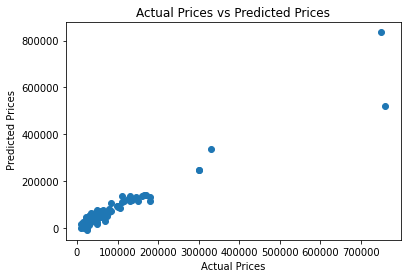

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel(" Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [34]:
df_new=df.sample(1)
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
249,Hero,Hero Glamour 125,35000,2014,0,0,450000,61600.0


In [35]:
df_new.shape

(1, 8)

In [36]:
X_new=df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [37]:
y_pred_new=lr.predict(X_new)

In [38]:
y_pred_new

array([25386.01773587])